#CODE:

#Movie Recomendation system

Necessary import Functions

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

 Loading the data from google drive

In [ ]:

ratings_df = pd.read_csv('/content/drive/MyDrive/ratings.csv')
tags_df = pd.read_csv('/content/drive/MyDrive/tags.csv')
movies_df = pd.read_csv('/content/drive/MyDrive/movies.csv')
links_df = pd.read_csv('/content/drive/MyDrive/links.csv')


**Converting the input data to numpy arrays**



In [ ]:

num_users = ratings_df['userId'].nunique()
num_movies = ratings_df['movieId'].nunique()
num_features = 15

**Creation of  helper matrix where each entry is 1 if the corresponding entry in the ratings matrix is greater than 0, and 0 otherwise.**

In [ ]:
movies = movies_df.iloc[:, 2:].to_numpy()
ratings = ratings_df.pivot(index='userId', columns='movieId', values='rating').fillna(0).to_numpy()
tags = tags_df.iloc[:, 2:].to_numpy()
links = links_df.iloc[:, 2:].to_numpy()
helper = (ratings > 0).astype(int)

 Initializing the necessary parameters

In [ ]:

learning_rate = 0.0001
num_iterations = 200
lambda_reg = 0.005

This code initializes two numpy arrays X and Theta with random values.'-0.5' is then subtracted from each entry of the rand array. This shifts the range of random values from the half-open interval [0, 1) to the half-open interval [-0.5, 0.5).

In [ ]:

X = np.random.rand(num_users, num_features)-0.5
Theta = np.random.rand(num_movies, num_features)-0.5

A function called predict_ratings that takes in three arguments

In [ ]:
def predict_ratings(X, Theta, user_id):

    predicted_ratings = np.dot(X[user_id], Theta.T)
    return predicted_ratings

Display of the predicted ratings

In [ ]:

user_id = 12

predicted_ratings = predict_ratings(X, Theta, user_id)

print("Predicted ratings for user", user_id, ":", predicted_ratings)

Predicted ratings for user 12 : [ 0.00277353 -0.41254612  0.28090663 ...  0.38783621 -0.33859565
  0.04683457]


 Get movie recommendations for a given user based on their ratings history

In [ ]:
def get_recommendations(user_id, num_recommendations=5):



    user_ratings = ratings_df[ratings_df['userId'] == user_id]


    movie_ratings = user_ratings.groupby('movieId').mean()['rating']


    top_movies = movie_ratings.sort_values(ascending=False).index.tolist()

    return top_movies[:num_recommendations]

In [ ]:
import re

In [ ]:

movies_df['imdbId'] = ""
movies_df['tmdbId'] = ""
movies_df['tag'] = ""


for i, movie in movies_df.iterrows():

    imdb_id = re.search('tt(\d{7})', movie['imdbId'])
    tmdb_id = re.search('/movie/(\d+)', movie['tmdbId'])


    if imdb_id:
        movies_df.at[i, 'imdbId'] = imdb_id.group(1)
    if tmdb_id:
        movies_df.at[i, 'tmdbId'] = tmdb_id.group(1)


    tags = tags_df.loc[tags_df['movieId'] == movie['movieId']]['tag'].values.tolist()
    if tags:
        movies_df.at[i, 'tag'] = tags[0]

 Top 10 movie recommendations for user_id

In [ ]:

movie_ids = get_recommendations(user_id, num_recommendations=10)


top_movies = movies_df.loc[movies_df['movieId'].isin(movie_ids[:10])][['title', 'imdbId', 'tmdbId', 'tag']].values.tolist()
for i, movie in enumerate(top_movies):
    title, imdb_id, tmdb_id, tag = movie
    imdb_link = f"http://www.imdb.com/title/tt{imdb_id:0>7}"
    if tmdb_id != '':
        tmdb_link = f"https://www.themoviedb.org/movie/{int(tmdb_id)}"
    else:
        tmdb_link = ''
    tag_list = tags_df.loc[tags_df['movieId'] == int(movie_ids[i])]['tag'].values.tolist()
    print(f"{i+1}. {title} ({imdb_link}, {tmdb_link})\n    tags: {', '.join(tag_list)}")

1. Shine (1996) (http://www.imdb.com/title/tt0000000, )
    tags: 
2. 'burbs, The (1989) (http://www.imdb.com/title/tt0000000, )
    tags: music
3. She's All That (1999) (http://www.imdb.com/title/tt0000000, )
    tags: In Netflix queue
4. 10 Things I Hate About You (1999) (http://www.imdb.com/title/tt0000000, )
    tags: memory loss, romance, sad
5. Never Been Kissed (1999) (http://www.imdb.com/title/tt0000000, )
    tags: 
6. Ghostbusters II (1989) (http://www.imdb.com/title/tt0000000, )
    tags: 
7. Romeo and Juliet (1968) (http://www.imdb.com/title/tt0000000, )
    tags: Ghosts
8. Love Actually (2003) (http://www.imdb.com/title/tt0000000, )
    tags: high school
9. Notebook, The (2004) (http://www.imdb.com/title/tt0000000, )
    tags: Shakespeare sort of
10. Pride & Prejudice (2005) (http://www.imdb.com/title/tt0000000, )
    tags: 


Gradient descent Method to calculate loss

In [ ]:

J_history = np.zeros(num_iterations)
for i in range(num_iterations):
    X_grad = np.dot((helper * np.dot(X, Theta.T) - helper * ratings), Theta) + lambda_reg * X
    Theta_grad = np.dot((helper * np.dot(X, Theta.T) - helper * ratings).T, X) + lambda_reg * Theta
    X = X - learning_rate * X_grad
    Theta = Theta - learning_rate * Theta_grad

    # Computation of  loss
    J = np.sum(helper * np.square(np.dot(X, Theta.T) - ratings)) + (lambda_reg / 2) * (np.sum(np.square(X)) + np.sum(np.square(Theta)))
    J_history[i] = J



 Ploting of loss function with number of iterations

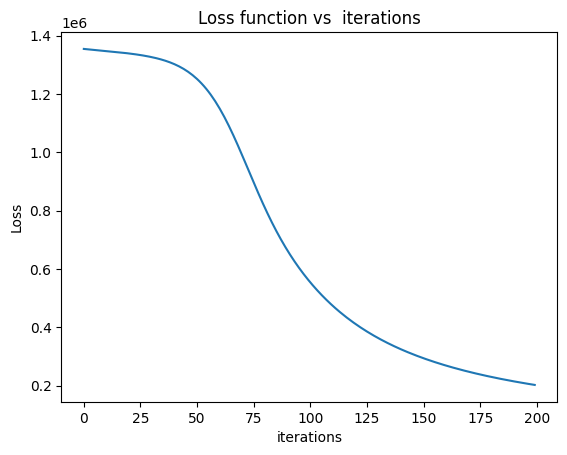

In [ ]:

plt.plot(np.arange(num_iterations), J_history.reshape(num_iterations, 1))
plt.xlabel('iterations')
plt.ylabel('Loss')
plt.title('Loss function vs  iterations')
plt.show()

# Ploting  of loss values versus feature dimension 𝑛 for a constant number of iterations

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [ ]:
def loss_function(X, Theta, Y):
    a= np.dot(X, Theta.T)-Y
    a=a*R
    a= np.linalg.norm(a)
    l= np.square(a)
    r1 = (lambda_reg / 2) * (np.square(np.linalg.norm(X)))
    r2= (lambda_reg / 2) * (np.square(np.linalg.norm(Theta)))
    J = l + r1 + r2
    return J


Loading The data

In [ ]:

ratings = pd.read_csv('/content/drive/MyDrive/ratings.csv')
movies = pd.read_csv('/content/drive/MyDrive/movies.csv')
tags = pd.read_csv('/content/drive/MyDrive/tags.csv')
links = pd.read_csv('/content/drive/MyDrive/links.csv')

movie_ratings = ratings.drop('timestamp', axis = 1)
ratings_matrix= movie_ratings.pivot_table(index=['movieId'], columns=['userId'], values='rating').fillna(0)
Y = ratings_matrix.to_numpy()
Y_train, Y_test = train_test_split(Y, test_size = 0.2)

Initializing user and movie features

In [ ]:

nm = Y.shape[0]
nu = Y.shape[1]
R = np.zeros((nm, nu))
for i in range(nm):
    for j in range(nu):
        if Y[i, j] > 0:
            R[i, j] = 1


Initialization of  parameters

In [ ]:

learning_rate = 0.001
num_iterations = 200
lambda_reg = 0.001


In [ ]:
n=10
feature = list()
loss = list()


In [ ]:
for itr in range(n):
    feature.append(itr+1)
    X = np.random.rand(nm, itr+1) - 0.5
    Theta = np.random.rand(nu, itr+1) - 0.5
    for i in range(num_iterations):
        X_grad = np.dot((np.dot(X, Theta.T) - Y), Theta) + lambda_reg * X
        Theta_grad = np.dot((np.dot(X, Theta.T) - Y).T, X) + lambda_reg * Theta
        X = X - learning_rate * X_grad
        Theta = Theta - learning_rate * Theta_grad
    current_loss = loss_function(X, Theta, Y)
    loss.append(current_loss)


# Plot loss function with number of iterations

Text(0.5, 1.0, 'Loss function vs features')

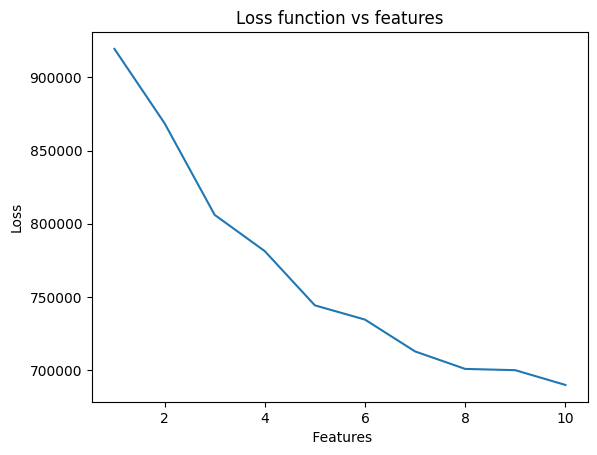

In [ ]:

plt.plot(feature,loss)
plt.xlabel(' Features')
plt.ylabel('Loss')
plt.title('Loss function vs features')

#Plot 2: Loss values vs feature dimensions

#Discussion:

---


Movie recommendation system predicts movies for a certain user based on these previous ratings on various other movies. In this project collaborating Filtering Algorithm was used. Collaborative filtering necessitates a group of things based on the user's previous choices. This system does not require a large number of product characteristics to function. An embedding or feature vector characterizes each object and User, sinking both in a comparable embedding position. It automatically generates enclosures for items and users. A cut down version of movie lens data set was used .All the data files were uploaded from google drive. Number of feature was selected to be 15 and helper matrix defined by “helper” was created to fill in the gaps in the matrix containing num_users  & num_movies values . The feature vectors  X and Theta was initialized randomly . The loss was calculated via gradient descent method and regularization parameter lamda_reg was used to prevent overfitting. Finally a “get_recomendations” function was created to recommend at least 10 movies for a specified user with movie links. Now in the case of  Plot of loss values versus iterations named plot 1 it is evident that loss decreases with number of iterations. In the case of the second graph named plot 2 the loss also decreases with increasing feature dimension.